# Fuzzy logic and inference in computational intelligence
Rodrigo Pereira Cruz <br>
pereirarodrigocs@gmail.com <br>
<br>
***

> This is a Jupyter notebook used for studying fuzzy logic and fuzzy inference in computational intelligence. The focus here is on the theoretical applications of the subjects mentioned previously. Please note that vagueness and imprecision are in no way related to probability, given we are dealing with approximate reasoning rather than the chances of some event happening. 

> The Python programming language proved itself to be an interesting choice for this project, given its abudance of libraries and ease of use makes working with fuzzy logic much easier.




## 1. Introduction to fuzzy logic
***
When dealing with uncertain events or missing data, regular mathematical logic (and even predicate logic) will not be useful, given it requires true/false situations in order to be employed as a viable option - this is where fuzzy logic comes in.

Fuzzy logic makes use of crisp (or fuzzy) sets, where each member has a degree of membership such that $0 \leq x \leq 1$ - should the element have a degree of 0, it does not belong in the fuzzy set. We can adapt this idea into a simple example, as shown below in Python:

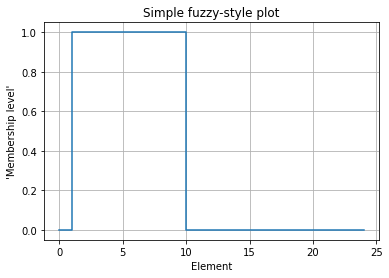

In [ ]:
# Simple Python script that creates a fuzzy-like set and plots it

import matplotlib.pyplot as plt
import numpy as np

X = [1 if x >= 2 and x <= 10 else 0 for x in range(25)]

# Optional: converting the list into a NumPy array
X = np.asarray(X)

plt.xlabel("Element")
plt.ylabel("'Membership level'")
plt.title("Simple fuzzy-style plot")
plt.grid(True, which = "both")
plt.plot(X, drawstyle = "steps-pre")

Generally speaking, a crisp set $(A, \mu A)$ can be described in two ways:

<br>

$\mu_A: S \Rightarrow [0, 1]$ = returns elements such that $0 \leq x \leq 1$; <br>
$\mu_A(x): S \Rightarrow [0, 1]$ = returns the degree of membership of a set element

<br>

The membership function $\mu_A(x)$ can be of different kinds, with some of the most common ones being the gaussian, triangular and trapezoid variations. The Python code below shows the triangular membership function in action:

In [ ]:
# Python code that uses temperature variance as an example
# Applies the triangular membership function to the crisp/fuzzy set 

# Importing the required libraries
!pip install scikit-fuzzy

import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

     |████████████████████████████████| 1.0MB 4.1MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=5d819f29dd15678496431a9001bea463d34376aad4e71cf5ffdebbc20bfc03d2
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


#### Creating our data and showing the results
***
We use the triangular membership function here, which is defined, mathematically, as

<br>

$$\mu_A(x) = \begin{cases} 0 & \mbox{if } x \leq a \\ \frac{x - a}{b - a} & \mbox{if } a \leq x \leq b \\ \frac{c - x}{c - b} & \mbox{if } b \leq x \leq c \\ 0 & \mbox{if } x \geq b \end{cases}$$

<br>

where $a$ is a lower limit, $b$ is an upper limit and $m$ is a value such that $a < b < c$.

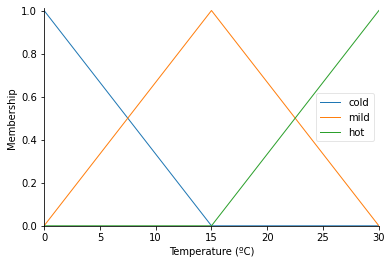

In [ ]:
temp = ctrl.Antecedent(np.arange(0, 31, 1), "Temperature (ºC)")

temp["cold"] = fuzz.trimf(temp.universe, [0, 0, 15])
temp["mild"] = fuzz.trimf(temp.universe, [0, 15, 30])
temp["hot"] = fuzz.trimf(temp.universe, [15, 30, 30])

temp.view()

## 2. Fuzzy inference
***
Fuzzy inference consists of a method that interprets data from the input and, based on fuzzy rules, assigns values to an output vector. It makes heavy usage of "IF... THEN" rules and "OR" and "AND" connectors for decision-making.

<br>

<center><font size = "2"><b>Figure 1</b>: the general structure of a fuzzy inference system


![Fuzzy inference system](https://miro.medium.com/max/537/1*ArAJV83q01pz2thVR9yHNw.jpeg)

**Source**: https://miro.medium.com/max/537/1*ArAJV83q01pz2thVR9yHNw.jpeg</font></center>

<br>

The figure above illustrates the composition of a fuzzy inference system, which consists of 4 essential parts: 

<br>

* **Fuzzification**: the crisp input data gets mapped into a fuzzy function (i.e. where the membership functions are used); <br>
* **Knowledge base**: where all the information about the system's domain is held. It consists of definitions and fuzzy rules that can, interestingly, benefit from being fine-tuned by other algorithms, such as genetic algorithms and neural networks; <br>
* **Inference engine**: the decision-making process takes place here. Based on the knowledge base, the system will reach a conclusion about a specific task; <br>
* **Defuzzification**: converts fuzzy control values into crisp quantities; essentially, it is the opposite of what's done in the fuzzification step, as now we get a single point that links back to the fuzzy set. Although many defuzzification techniques exist, one of the most common is the center-of-area/center-of-gravity which is, mathematically, defined as

<br>

$$\overline{x} = \frac{\sum_i x_i \mu(x_i)}{\sum_i \mu(x_i)}$$

<br>

where

<br>

$x_i$ = element; <br>
$\mu(x_i)$ = membership function.

<br>

By once again using SciKit-Fuzzy, the process of creating a fuzzy inference system is simplified, as shown in the code below:

In [ ]:
# Very simple fuzzy inference system using SciKit-Fuzzy
# A simplified weather forecast model is used as an example

# Generating the data we need
temp_range = np.arange(-10, 41, 1)
weather_range = np.arange(0, 11, 1)
sunny = ctrl.Antecedent(weather_range, "sunny")
snowy = ctrl.Antecedent(weather_range, "snowy")
temp = ctrl.Consequent(temp_range, "temperature")

#### Using the triangular membership function

In [ ]:
temp_cold_mfx = fuzz.trimf(temp.universe, [-10, -10, 15])
temp_mild_mfx = fuzz.trimf(temp.universe, [-10, 15, 35])
temp_hot_mfx = fuzz.trimf(temp.universe, [15, 40, 40])

temp["cold"] = temp_cold_mfx
temp["mild"] = temp_mild_mfx
temp["hot"] = temp_hot_mfx

# We can use .automf to apply a membership function automatically to other objects
sunny.automf(3, names = ["barely", "normal", "very"])
snowy.automf(3, names = ["no snow", "normal", "heavy"])

#### Checking our results

In [ ]:
#temp.view()
#sunny.view()
#snowy.view()

#### Setting rules in our knowledge base

In [ ]:
rule1 = ctrl.Rule(snowy["heavy"] | sunny["barely"], temp["cold"])
rule2 = ctrl.Rule(sunny["normal"],  temp["mild"])
rule3 = ctrl.Rule(sunny["very"] | snowy["no snow"], temp["hot"])

# Checking our rules
#rule1.view()
#rule2.view()
#rule3.view()

#### Establishing our control system for inputs

Resulting suggested temperature: 8.682539682539682


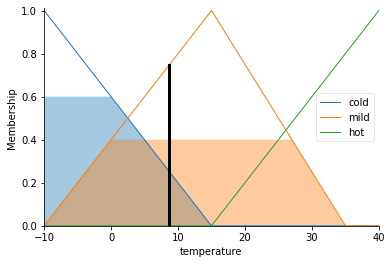

In [ ]:
weather_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
weather = ctrl.ControlSystemSimulation(weather_ctrl)

# Computing and showing the output value for a scenario
weather.input["sunny"] = 2.0
weather.input["snowy"] = 6.5

weather.compute()

print(f"Resulting suggested temperature: {weather.output['temperature']}")
temp.view(sim = weather)

## 3. Fuzzy inference in an intelligent system
***
> This section is completely devoted to personal experiments and thoughts on fuzzy inference in computational intelligence. Nothing here is related to the project's references mentioned on GitHub.

<br>

Fuzzy inference systems are an interesting choice when it comes to decision-making processes. Unlike Bayesian inference, there doesn't seem to be a plausible way for a fuzzy system to retain or improve its knowledge over time, which could be seen as a weakness when comparing those 2 techniques.

Nevertheless, fuzzy inference is interesting in its capacity to allow an agent to react to what's happening around it when faced with incomplete data. Through the use of rules and connectors, even simple ones, it can deal with complex decision-making situations.

Suppose that we have an intelligent agent, $A$, that is currently engaged in a conversation with a human being. Regardless of having prior knowledge about conversations or not, the agent will have to react to what the person is saying and, more often than not, will have to come up with answers when faced with incomplete information (e.g. informal language). As such, we have the following situation:

<br>

* The agent must balance its replies in regards to what the person says. If something negative is said (disregarding things such as personal problems), it'd not make a lot of sense for the agent to reply with "this is great" or something similar;
* Conditions and connections are evident here. Although extremely varied, "IF" and "ELSE" can, fundamentally, support a fuzzy system in this environment.

<br>

As such, we can use a fuzzy inference system where we have 2 antecedents (inputs), topic type and mood, and a consequent (output), which is our agent's reply type (sad, normal or happy). The following Python code shows our fuzzy inference in action:

In [ ]:
# The conversational agent fuzzy inference system
# Note that creating a fully accurate system is impossible without other techniques
# 2 inputs: topic type (sad, normal, happy) and mood (sad, normal, happy)
# 1 output: reply type (sad, normal, happy)

''' We'll use numbers to represent our attributes, with 0 <= x <= 4 being sad, 
    5 <= x <= 7 being normal and 8 <= x <= 10 being happy
'''
emotion_range = np.arange(0, 11, 1)

# -- Creating our antecedents and consequent
topic_type = ctrl.Antecedent(emotion_range, "topic type")
mood = ctrl.Antecedent(emotion_range, "mood")
reply_type = ctrl.Consequent(emotion_range, "reply type")

### Applying the triangular membership function

In [ ]:
# Storing all category names in a list
cat_names = ["sad", "normal", "happy"]

rtype_sad_mfx = fuzz.trimf(reply_type.universe, [0, 0, 5])
rtype_normal_mfx = fuzz.trimf(reply_type.universe, [0, 5, 10])
rtype_happy_mfx = fuzz.trimf(reply_type.universe, [5, 10, 10])

reply_type["sad"] = rtype_sad_mfx
reply_type["normal"] = rtype_normal_mfx
reply_type["happy"] = rtype_happy_mfx

# Using .automf
topic_type.automf(3, names = cat_names)
mood.automf(3, names = cat_names)

### Checking our results

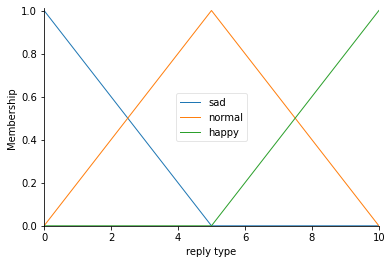

In [ ]:
#reply_topic.view()
#mood.view()
reply_type.view()

### Creating and adding our rules to the knowledge base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0a52d7940>)

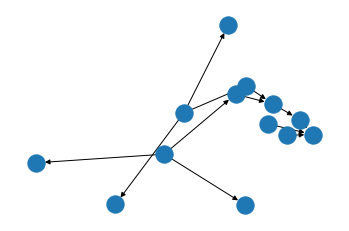

In [ ]:
ag_rule1 = ctrl.Rule(mood["sad"] | topic_type["sad"], reply_type["sad"])
ag_rule2 = ctrl.Rule(topic_type["normal"] & mood["normal"],  reply_type["normal"])
ag_rule3 = ctrl.Rule(topic_type["happy"] & mood["normal"], reply_type["normal"])
ag_rule4 = ctrl.Rule(topic_type["happy"] & mood["happy"], reply_type["happy"])
ag_rule5 = ctrl.Rule(mood["happy"], reply_type["happy"])

# Checking our rules
ag_rule1.view()
#ag_rule2.view()
#ag_rule3.view()
#ag_rule4.view()
#ag_rule5.view()

### Adding our control system and handling inputs

Resulting suggested reply: 5.595238095238095


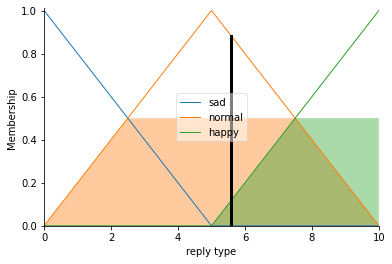

In [ ]:
reply_ctrl = ctrl.ControlSystem([ag_rule1, ag_rule2, ag_rule3, ag_rule4, ag_rule5])
reply = ctrl.ControlSystemSimulation(reply_ctrl)

# Computing and showing the output value for a scenario
reply.input["topic type"] = 5.3
reply.input["mood"] = 7.5

reply.compute()

print(f"Resulting suggested reply: {reply.output['reply type']}")
reply_type.view(sim = reply)

## 4. Conclusion
***
Fuzzy logic is considered one of the main pillars behind computational intelligence not only because of how useful it is, but also because of how far it can reach - it's not uncommon to see other techniques, which often require precise data and belong to other subfields of computational intelligence, use this type of logic in order to better deal with imprecise data. Fuzzy neural networks (also known as neuro-fuzzy systems) are one of such techniques; they are, in essence, made up of a neural network infused with fuzzy rules. Despite logic being overlooked when it comes to artificial intelligence, it seems rather clear that fuzzy logic will not follow that trend and, quite on the contrary, will continue to be widely used and studied in the foreseeable future. 